In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('heart_v2.csv')

In [17]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [18]:
df.shape

(270, 5)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


##SPLIT THE DATA SET

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df
X

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [23]:
X = X.drop('heart disease' , axis=1)

In [22]:
y = df['heart disease']
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: heart disease, Length: 270, dtype: int64

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 42)

In [25]:
X_train.shape , X_test.shape

((189, 4), (81, 4))

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [28]:
!pip install six

In [30]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

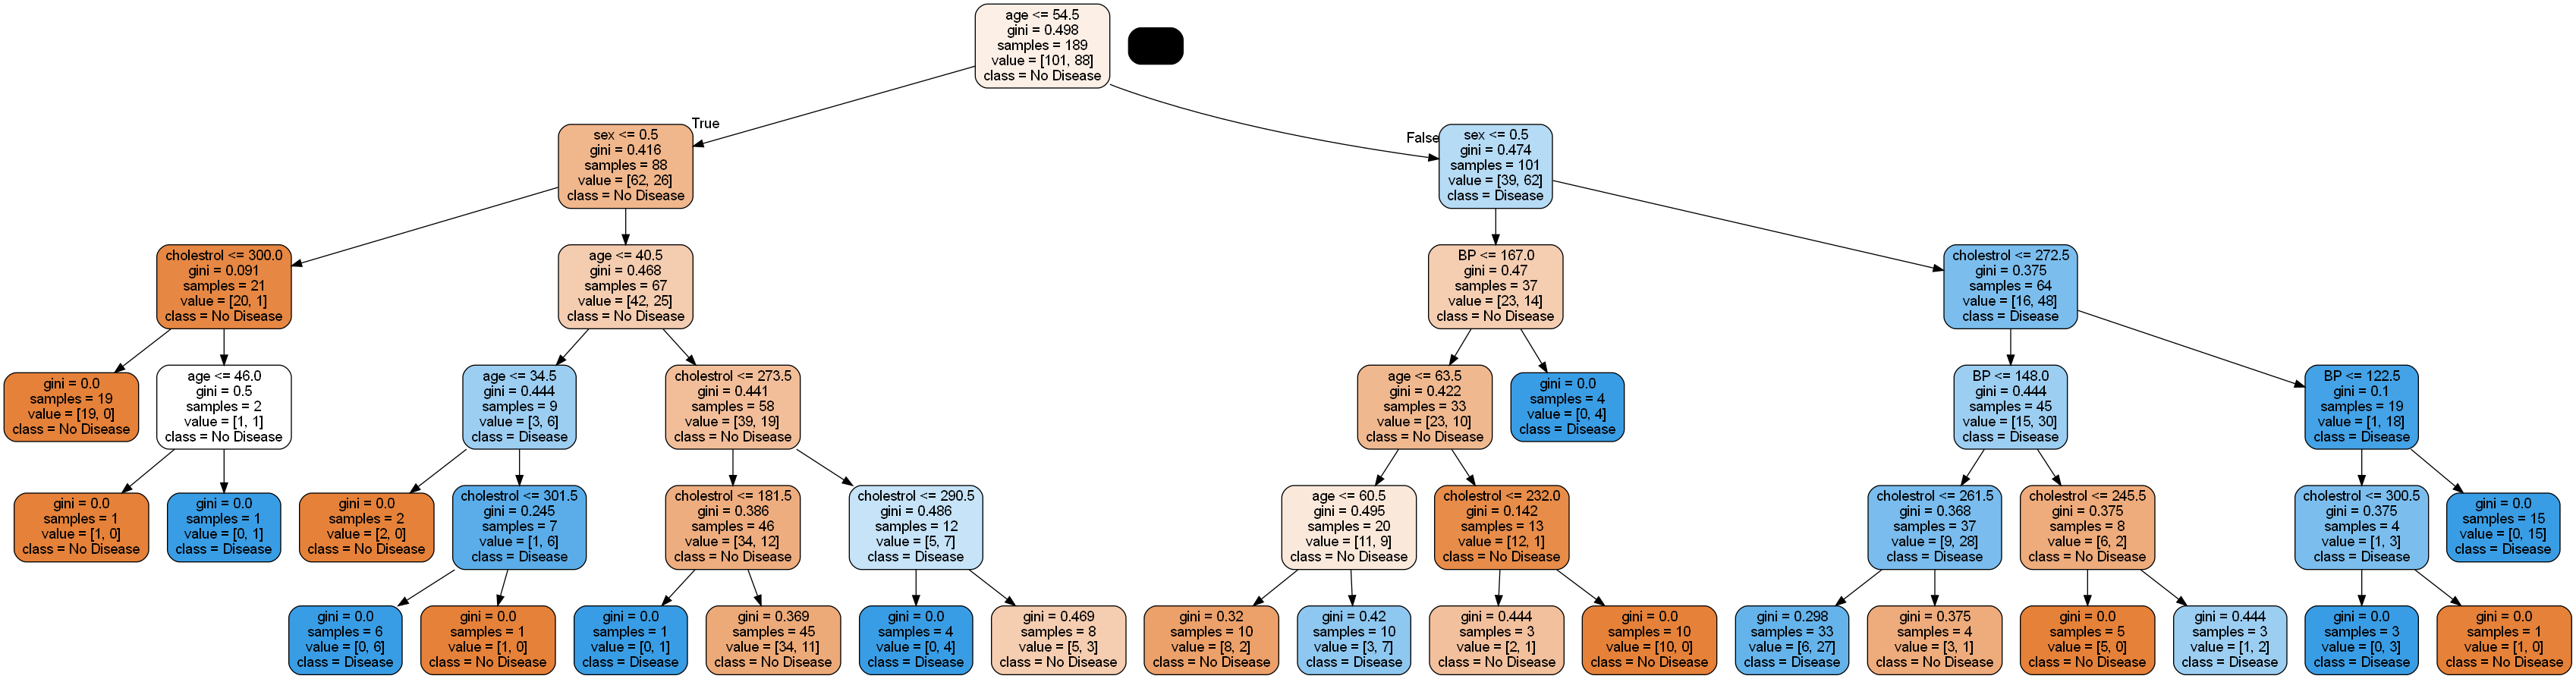

In [31]:
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [33]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [38]:
print(accuracy_score(y_train,y_train_pred))
confusion_matrix(y_train,y_train_pred)

0.8518518518518519


array([[91, 10],
       [18, 70]], dtype=int64)

In [37]:
print(accuracy_score(y_test,y_test_pred))
confusion

0.6419753086419753


In [39]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [43]:
def evaluate_matrix(dt_classifier):
    print("Accuracy Score of train set : ",accuracy_score(y_train,dt_classifier.predict(X_train)))
    print("Accuracy Score of test set: ",accuracy_score(y_test,dt_classifier.predict(X_test)))
    print("Confusion Matrix: ")
    print(confusion_matrix(y_train,dt_classifier.predict(X_train)))
    print("Confusion Matrix of Test Set: ")
    print(confusion_matrix(y_test,dt_classifier.predict(X_test)))       

In [71]:
dt1 = DecisionTreeClassifier(max_depth = 5,min_samples_split = 20)

In [72]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=20)

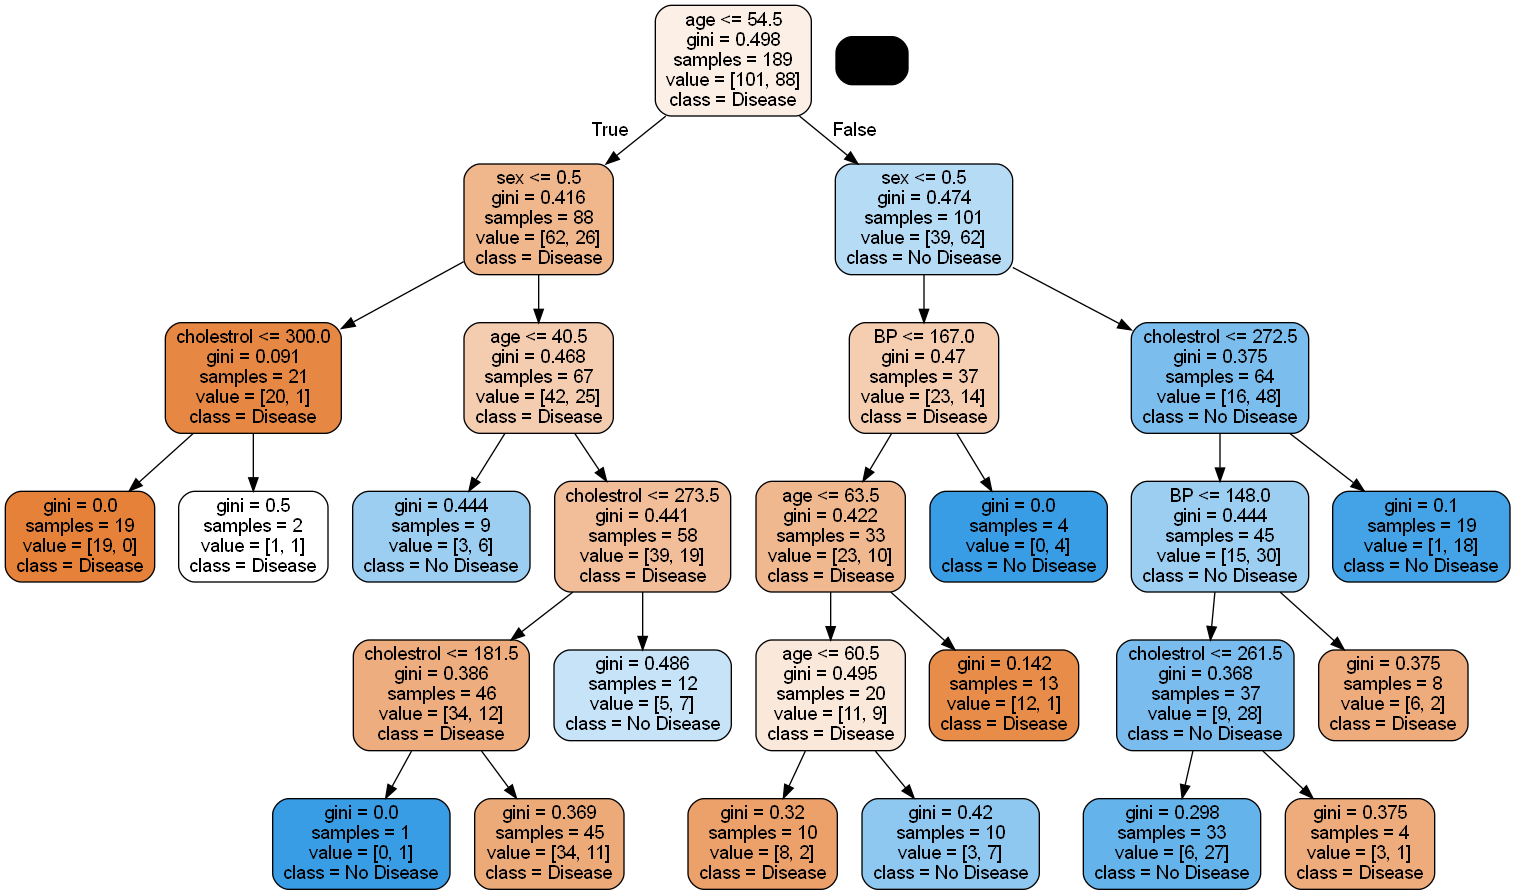

In [73]:
gph = get_dt_graph(dt1) 
Image(gph.create_png())

In [74]:
evaluate_matrix(dt1)

Accuracy Score of train set :  0.8095238095238095
Accuracy Score of test set:  0.654320987654321
Confusion Matrix: 
[[83 18]
 [18 70]]
Confusion Matrix of Test Set: 
[[32 17]
 [11 21]]


In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
params = {
    'max_depth' : [5,10,15,20],
    'min_samples_split' : [5,10,20,50,100],
    'criterion' : ['gini' , 'entropy']
    
}

In [78]:
gd = GridSearchCV(estimator = dt,
                 param_grid = params,
                 cv = 4, n_jobs=-1, verbose=1, scoring='accuracy')

In [79]:
gd.fit(X_train,y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=5,
                                              min_samples_split=20),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [81]:
score = pd.DataFrame(gd.cv_results_)
score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008253,0.004506,0.011608,0.014061,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.645833,0.744681,0.574468,0.553191,0.629543,0.074808,17
1,0.008328,0.002606,0.003560,0.000572,gini,5,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.666667,0.744681,0.574468,0.553191,0.634752,0.076468,11
2,0.005257,0.000261,0.003392,0.001171,gini,5,20,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.645833,0.765957,0.553191,0.617021,0.645501,0.077204,5
3,0.003636,0.000958,0.002758,0.000572,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.687500,0.744681,0.595745,0.510638,0.634641,0.089152,12
4,0.004274,0.000284,0.002896,0.000577,gini,5,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.541667,0.680851,0.574468,0.702128,0.624778,0.068128,18
5,0.004504,0.000921,0.002758,0.000250,gini,10,5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.604167,0.702128,0.595745,0.489362,0.597850,0.075312,37
6,0.004384,0.000430,0.002493,0.000499,gini,10,10,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.666667,0.723404,0.595745,0.510638,0.624113,0.079610,26
7,0.004143,0.000432,0.002890,0.000560,gini,10,20,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.645833,0.765957,0.553191,0.617021,0.645501,0.077204,5
8,0.003740,0.000432,0.002758,0.000572,gini,10,50,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.687500,0.744681,0.595745,0.510638,0.634641,0.089152,12
9,0.002742,0.000827,0.002509,0.000353,gini,10,100,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.541667,0.680851,0.574468,0.702128,0.624778,0.068128,18


In [82]:
best_score = gd.best_estimator_

In [83]:
best_score

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20)

In [85]:
evaluate_matrix(best_score)

Accuracy Score of train set :  0.7671957671957672
Accuracy Score of test set:  0.654320987654321
Confusion Matrix: 
[[94  7]
 [37 51]]
Confusion Matrix of Test Set: 
[[38 11]
 [17 15]]


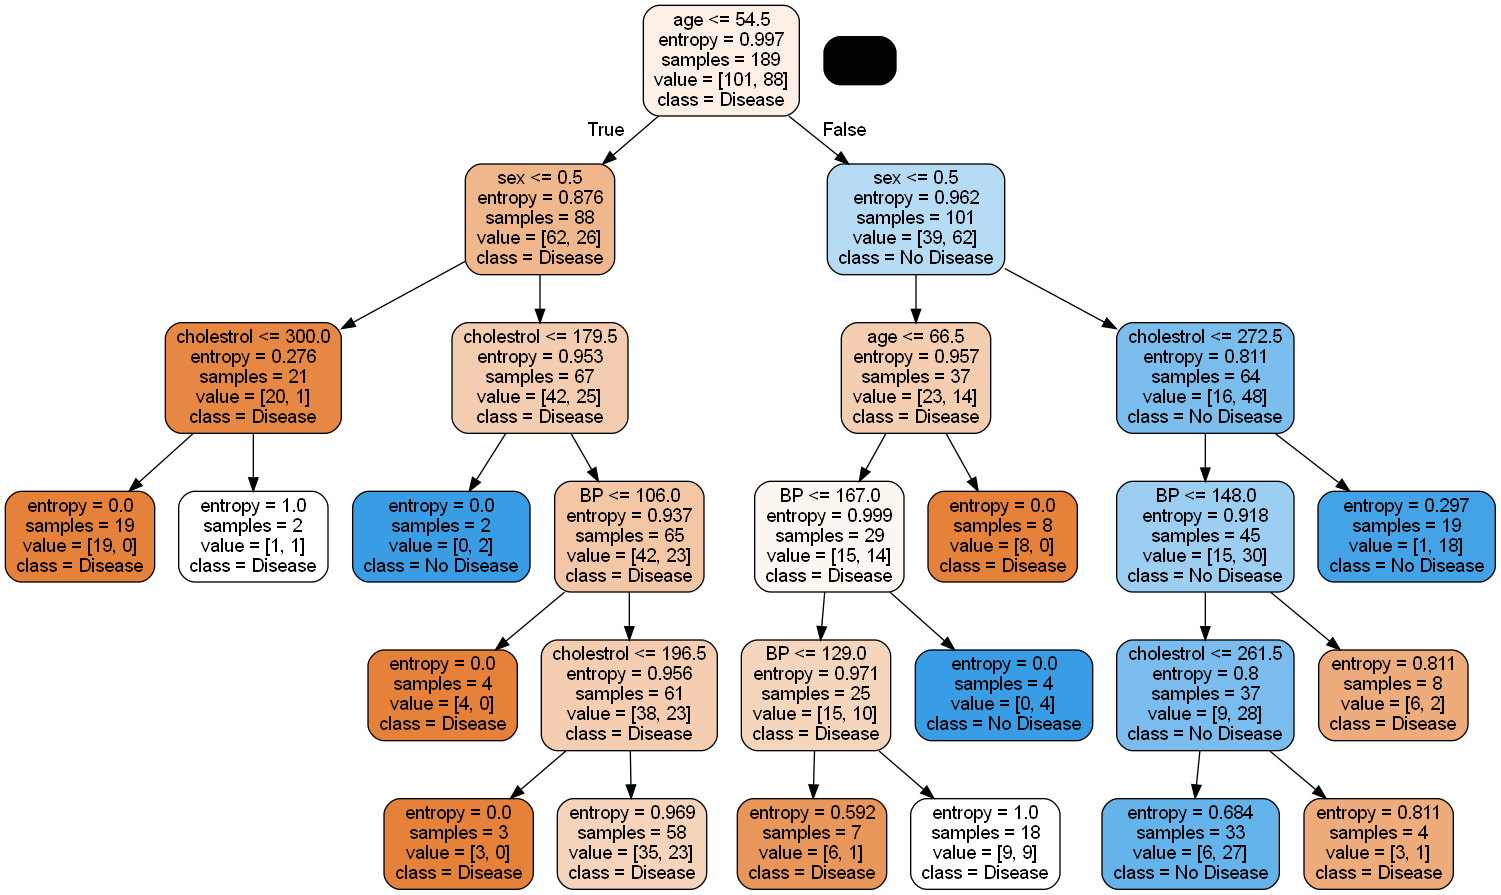

In [86]:
gph = get_dt_graph(best_score)
Image(gph.create_png())

In [87]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, best_sco))